In [35]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,MaxPooling2D
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.utils import np_utils
from sklearn.utils import shuffle
import glob
import matplotlib.pyplot as plt
from keras.models import model_from_json

In [21]:
# creating dictionary to convert labels of fruits into numeric label which cna be used in our deep learning models
keys =0
fruitname_label_map = {}
# accessing names of fruits from the directory we have 
for sub_folder in glob.glob('/kaggle/input/fruits/fruits-360/Training/*') :
    name = sub_folder.split('/')[-1]
    # creating dictionary with the help of names we obtain
    fruitname_label_map[name] = keys
    keys += 1
    
fruitname_label_map

{'Papaya': 0,
 'Watermelon': 1,
 'Onion White': 2,
 'Apple Granny Smith': 3,
 'Kiwi': 4,
 'Kaki': 5,
 'Tomato 4': 6,
 'Strawberry': 7,
 'Carambula': 8,
 'Strawberry Wedge': 9,
 'Tomato Maroon': 10,
 'Apple Red 1': 11,
 'Potato Red Washed': 12,
 'Lychee': 13,
 'Peach 2': 14,
 'Pear Red': 15,
 'Plum 2': 16,
 'Dates': 17,
 'Banana': 18,
 'Tomato Cherry Red': 19,
 'Huckleberry': 20,
 'Avocado': 21,
 'Cauliflower': 22,
 'Apricot': 23,
 'Potato Sweet': 24,
 'Pomegranate': 25,
 'Pepper Red': 26,
 'Cocos': 27,
 'Onion Red': 28,
 'Tomato 1': 29,
 'Walnut': 30,
 'Apple Red 3': 31,
 'Potato Red': 32,
 'Pear Monster': 33,
 'Tomato 3': 34,
 'Nut Forest': 35,
 'Mango Red': 36,
 'Pear': 37,
 'Ginger Root': 38,
 'Apple Crimson Snow': 39,
 'Cherry 1': 40,
 'Pear Abate': 41,
 'Pepper Yellow': 42,
 'Pepper Green': 43,
 'Avocado ripe': 44,
 'Grapefruit White': 45,
 'Apple Golden 3': 46,
 'Apple Red Yellow 2': 47,
 'Cherry Rainier': 48,
 'Hazelnut': 49,
 'Apple Braeburn': 50,
 'Peach Flat': 51,
 'Limes': 5

In [22]:
# reversing above dictionary to convert labels to name of fruit
fruitlabel_name_map = {v: k for k, v in fruitname_label_map.items()}
fruitlabel_name_map

{0: 'Papaya',
 1: 'Watermelon',
 2: 'Onion White',
 3: 'Apple Granny Smith',
 4: 'Kiwi',
 5: 'Kaki',
 6: 'Tomato 4',
 7: 'Strawberry',
 8: 'Carambula',
 9: 'Strawberry Wedge',
 10: 'Tomato Maroon',
 11: 'Apple Red 1',
 12: 'Potato Red Washed',
 13: 'Lychee',
 14: 'Peach 2',
 15: 'Pear Red',
 16: 'Plum 2',
 17: 'Dates',
 18: 'Banana',
 19: 'Tomato Cherry Red',
 20: 'Huckleberry',
 21: 'Avocado',
 22: 'Cauliflower',
 23: 'Apricot',
 24: 'Potato Sweet',
 25: 'Pomegranate',
 26: 'Pepper Red',
 27: 'Cocos',
 28: 'Onion Red',
 29: 'Tomato 1',
 30: 'Walnut',
 31: 'Apple Red 3',
 32: 'Potato Red',
 33: 'Pear Monster',
 34: 'Tomato 3',
 35: 'Nut Forest',
 36: 'Mango Red',
 37: 'Pear',
 38: 'Ginger Root',
 39: 'Apple Crimson Snow',
 40: 'Cherry 1',
 41: 'Pear Abate',
 42: 'Pepper Yellow',
 43: 'Pepper Green',
 44: 'Avocado ripe',
 45: 'Grapefruit White',
 46: 'Apple Golden 3',
 47: 'Apple Red Yellow 2',
 48: 'Cherry Rainier',
 49: 'Hazelnut',
 50: 'Apple Braeburn',
 51: 'Peach Flat',
 52: 'Limes

In [24]:
# rotating images to 20degree rescaling images value from range 0-255 to 0-1 and other augmentation process

img_generator = ImageDataGenerator(rotation_range=20, rescale=1./255, horizontal_flip=True, shear_range=0.1)
# shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)

# using flow_from _directory which best suit with the type folders we have in our dataset it labels the class according to the folders we have
# and we don't need to wory about labaling data on our own.
train = img_generator.flow_from_directory(directory="/kaggle/input/fruits/fruits-360/Training/", 
                                                    target_size=(100, 100), # size of each image
                                                    batch_size=32, # creating batches as it will easy computer processing
                                                    class_mode="categorical",
                                                    shuffle=True, # random pick the data
                                                    seed=0   # seed set so that random value fixed for different computers
                                                   )


Found 64762 images belonging to 125 classes.


In [25]:
# performing sam for test data
test_gen = ImageDataGenerator(rescale=1./255)
test = test_gen.flow_from_directory(directory="/kaggle/input/fruits/fruits-360/Test/",
                                     target_size=(100, 100),
                                     color_mode="rgb",
                                     batch_size=32,
                                     class_mode="categorical",
                                     shuffle=True,
                                     seed=0
                                    )

Found 21712 images belonging to 125 classes.


In [26]:
# deep learning model 
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(strides=2, pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu"))
model.add(MaxPool2D(strides=2, pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(5,5),activation="relu"))
model.add(MaxPool2D(strides=2, pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(5,5),activation="relu"))
model.add(MaxPool2D(strides=2, pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(125,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 128)        

In [27]:
checkpoint = ModelCheckpoint("fruits_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(), metrics = ['acc'])

In [30]:
# training deep network using fit_generate as we have augmented the data callback is used to monitor the loss and accuracy of the model
# in each step / epoch
trained_model = model.fit_generator(train, epochs=15,shuffle=False,validation_data=test,callbacks=[checkpoint])

Epoch 1/15
2024/2024 [==============================] - 272s 135ms/step - loss: 0.1257 - acc: 0.9605 - val_loss: 0.1843 - val_acc: 0.8979

Epoch 00001: val_acc improved from 0.88840 to 0.89789, saving model to fruits_classifier.h5
Epoch 2/15
2024/2024 [==============================] - 267s 132ms/step - loss: 0.1094 - acc: 0.9671 - val_loss: 1.1174 - val_acc: 0.8962

Epoch 00002: val_acc did not improve from 0.89789
Epoch 3/15
2024/2024 [==============================] - 244s 121ms/step - loss: 0.0944 - acc: 0.9719 - val_loss: 0.4308 - val_acc: 0.9401

Epoch 00003: val_acc improved from 0.89789 to 0.94008, saving model to fruits_classifier.h5
Epoch 4/15
2024/2024 [==============================] - 240s 119ms/step - loss: 0.0908 - acc: 0.9735 - val_loss: 0.5468 - val_acc: 0.9228

Epoch 00004: val_acc did not improve from 0.94008
Epoch 5/15
2024/2024 [==============================] - 250s 123ms/step - loss: 0.0844 - acc: 0.9757 - val_loss: 0.4900 - val_acc: 0.9172

Epoch 00005: val_acc 

## for total model was trained for 25 epochs and the plot don't show previous epochs as the kernel didn't restart and training again will take lot of time.

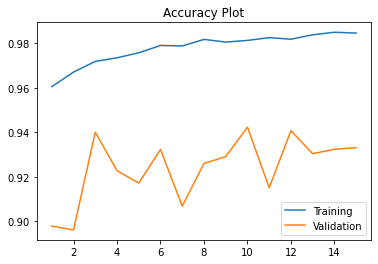

In [31]:
# Plots visualize the models we have trained above 
ep = range(1,len(trained_model.history['acc'])+1)
plt.plot(ep, trained_model.history['acc'], label = 'Training')
plt.plot(ep, trained_model.history['val_acc'], label='Validation')
plt.title('Accuracy Plot')
plt.legend()
plt.savefig('Accuracy.jpg')

In [32]:
classifier_json = model.to_json()
with open("fruit_model.json", "w") as json_file:
    json_file.write(classifier_json)
model.save_weights("fruit_model_weights.h5")
print("Model Saved.....")

Model Saved.....


In [36]:
json_file = open('/kaggle/working/fruit_model.json', 'r')
model_json = json_file.read()
json_file.close()
fruit_clf = model_from_json(model_json)

fruit_clf.load_weights("/kaggle/working/fruit_model_weights.h5")
print("Model loaded.....")

Model loaded.....


In [53]:

xtest,ytest=test.next()  # get x and y to test on
ypred = fruit_clf.predict(xtest)   # model gives preidction

pred_result = ypred.argmax(axis=1)   # taking class with max value
test_result = ytest.argmax(axis=1)


## showing the answers below

In [54]:
for i in range(32):
    print("Actual o/p:{} ---- Predicted o/p:{}".format(fruitlabel_name_map[test_result[i]],fruitlabel_name_map[pred_result[i]]))

Actual o/p:Cantaloupe 1 ---- Predicted o/p:Cantaloupe 1
Actual o/p:Dates ---- Predicted o/p:Dates
Actual o/p:Cherry Wax Red ---- Predicted o/p:Cherry Wax Red
Actual o/p:Apple Golden 3 ---- Predicted o/p:Apple Golden 3
Actual o/p:Pear 2 ---- Predicted o/p:Pear 2
Actual o/p:Apple Pink Lady ---- Predicted o/p:Apple Pink Lady
Actual o/p:Cherry 1 ---- Predicted o/p:Cherry 1
Actual o/p:Apple Crimson Snow ---- Predicted o/p:Apple Crimson Snow
Actual o/p:Apple Braeburn ---- Predicted o/p:Apple Braeburn
Actual o/p:Tomato 2 ---- Predicted o/p:Tomato 2
Actual o/p:Lemon Meyer ---- Predicted o/p:Lemon Meyer
Actual o/p:Plum 3 ---- Predicted o/p:Plum 3
Actual o/p:Guava ---- Predicted o/p:Guava
Actual o/p:Apple Golden 3 ---- Predicted o/p:Apple Golden 3
Actual o/p:Dates ---- Predicted o/p:Dates
Actual o/p:Pear 2 ---- Predicted o/p:Pear 2
Actual o/p:Onion White ---- Predicted o/p:Onion White
Actual o/p:Pear Kaiser ---- Predicted o/p:Pear Kaiser
Actual o/p:Quince ---- Predicted o/p:Quince
Actual o/p:Red